In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot

import os
import sys
os.chdir('/home/mk7976/git/gaiablip') # Go to the parents directory
cwd = os.getcwd() # Retrieve directory of current running processes
sys.path.insert(0, cwd) # Change the system path to the current running directory

import dynamics_fcns as df
import bh_prior_fcns

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

# Change system path 
os.chdir('/home/mk7976/git/gaiablip/analysis/') # Go to the parents directory
cwd = os.getcwd() # Retrieve directory of current running processes
sys.path.insert(0, cwd) # Change the system path to the current running directory

import analysis_fcns as af 
import dynamics_fcns as df
import dynamics_fcns_for_plot as dffp


priors = bh_prior_fcns.BH_priors() # Iniialize prior and dynamics functions
dynamics = df.Dynamics()
dynamics_for_plot = dffp.Dynamics()


In [3]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : False,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()]}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)


<ipython-input-3-3c413fd5304f>:7: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]



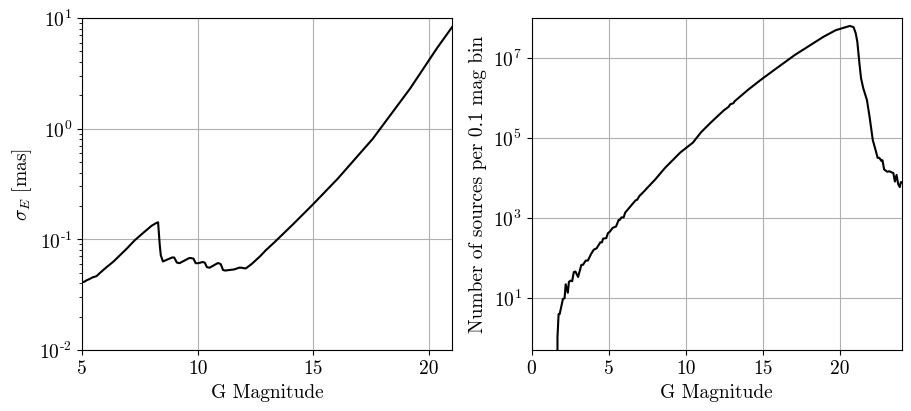

In [18]:
g_mag_for_error = [5,5.092753623188406, 5.208695652173914, 5.3246376811594205,5.463768115942029, 5.626086956521739, 5.811594202898551, 6.066666666666666, 6.368115942028986, 6.6695652173913045,6.947826086956522, 7.2724637681159425,7.666666666666667, 8.014492753623188, 8.223188405797101, 8.292753623188407, 8.36231884057971,  8.408695652173915, 8.501449275362319, 8.895652173913044, 8.98840579710145,  9.104347826086958, 9.220289855072465, 9.63768115942029,  9.707246376811595, 9.823188405797103, 9.915942028985508, 10.031884057971016,10.217391304347828,10.310144927536232,10.402898550724638,10.518840579710146,10.866666666666667,10.913043478260871,11.005797101449275,11.098550724637683,11.191304347826087,11.585507246376812,11.794202898550726,11.910144927536233,12.002898550724638,12.095652173913045,12.350724637681159,12.698550724637682,12.953623188405798,13.30144927536232, 14.136231884057972,14.947826086956523,16.06086956521739, 17.56811594202899, 19.19130434782609, 20.35072463768116, 20.9304347826087,  21.0]
mean_error = [0.04111766257188456,0.04111766257188456,0.04260119516264824,0.04361983582146327,0.04519364726883746,0.04627427626181337,0.0502640509351736,0.05590331759206814,0.06291421740437438,0.07249737117543273,0.08255903298452262,0.09740927275043039,0.11493068746997773,0.1324370397140043,0.14049636014464473,0.14216614747841227,0.08967728453739633,0.07164586612822334,0.06291421740437438,0.06833869016703958,0.06833869016703958,0.06144500096513941,0.06072330957689598,0.06753603017187791,0.06753603017187791,0.06674279767768601,0.06072330957689598,0.06072330957689598,0.062175269594371474,0.06144500096513941,0.05590331759206814,0.05524671506547167,0.06072330957689598,0.06072330957689598,0.059305256736761215,0.052696524553825036,0.05207758684752684,0.053322818282309996,0.05524671506547167,0.05524671506547167,0.05459782454768791,0.05459782454768791,0.060010094687174484,0.06997274217211912,0.07968401936983739,0.09291285693964141,0.1372153917007326,0.20264217827051295,0.35309581012584546,0.8073671629226794,2.3106858854972776,5.346265850988684,7.895462340117487,8.277554580835647]

g_mag_for_pdf = [1.6817518248175176,1.6817518248175176,1.754355971246981, 1.8244289639477111,2.036313174766173, 2.141489273125919, 2.2130942799256195,2.352307735005967, 2.423579695262413, 2.5288224029308095,2.633865282673252, 2.7399739113541113,2.8451500097138576,3.019733007687824, 3.231284171963032, 3.3363936610141254,3.512042407926507, 3.6521883933279664,3.863140073825316, 4.038788820737698, 4.214104521106823, 4.460026088645887, 4.565135577696981, 4.635608226249617, 4.845893813660459, 4.951536177180759, 5.091881990508171, 5.267464128111903, 5.477816324831394, 5.653731508978379, 5.723804501679109, 5.829180427964807, 5.969326413366265, 6.0749687768865686,6.741994393716522, 6.847170492076267, 6.987716133329632, 7.338680580611139, 7.443989897588186, 8.005572978823789, 8.637495489994723, 9.655285726180232, 10.006116954844437,10.462190891177041,10.98887069467958, 11.62059337792456, 12.462801476506339,12.77852959951153, 12.883905525797228,13.09425772251672, 13.1645305431434,  14.04170852876689, 14.8486136937637,  15.86593766478865, 17.05864394549138, 18.917576531320247,19.724148649773802,20.635563820043846,20.8806860758791,  21.02016596819405, 21.12434292692403, 21.262090977214065,21.365601842857536,21.50468207932058, 21.74860536760012, 21.92192278870972, 22.129610613083177,22.338564014320998,22.44300741028558, 22.548116899336677,22.687929838194883,22.758069440204263,22.862179789625596,23.072132330493183,23.177308428852932,23.457400571729895,23.56157753045988, 23.667419721906132,23.771530071327465,23.876306513835303,23.946912381005244,24.01698537370597]
g_mag_pdf = [0,1.035640737889443,3.9188252128153493,3.9188252128153493,9.405546403546282,9.740767017622048,21.797317080605467,13.349816162713745,25.0749192853052,26.894148259066778,25.968607911151757,43.91223594921216,45.47730044081732,33.182763177043746,66.84902186304751,66.84902186304751,85.41987574720737,85.41987574720737,125.5623153972163,160.44389402937102,172.08437738886886,244.24894674383643,244.24894674383643,301.3612804529228,312.10201885957173,413.01857290378734,458.7720572683539,566.0459807812945,607.113600461412,892.4221525289144,892.4221525289144,1026.6132001626743,1026.6132001626743,1358.5632044442448,2736.9216020881136,2834.4675075320847,3497.2464318052625,4793.010330279341,5323.971738779321,9002.696793763018,17512.413679012803,43529.45903421155,55622.07012786342,76230.58938307522,138256.13461441276,242119.8623028868,487767.57626263774,601821.4747926506,692315.7032943389,742544.4107965486,824802.1985045371,1604438.940293707,2809759.844514032,5465659.664323865,11809821.840052292,33768915.26044431,49638367.55162211,63428051.30702449,59137521.3532428,41665045.75787101,25517851.542084556,7232952.105806617,3121020.188595718,1782175.9157825315,884643.0314926221,331827.6317704374,87693.17199833857,45080.88107411904,31761.50994795305,31761.50994795305,26659.715671437192,27609.887609889964,16327.803180905015,14193.557279862349,14699.426134592719,13233.44765320542,8104.854956043094,11913.671675794318,7045.450131228104,5913.752135324292,7825.932931684563,7825.932931684563]

fig, axd = plt.subplot_mosaic([['left', 'right']],
                              figsize=(9, 4), constrained_layout=True)

axd['left'].plot(g_mag_for_error,mean_error,color='black')
axd['left'].set_yscale('log')
axd['left'].set_xlim(5,21)
axd['left'].set_xlabel('G Magnitude')
axd['left'].set_ylim(1e-2,1e1)
axd['left'].set_ylabel('$\sigma_E$ [mas]')
axd['left'].grid()

axd['right'].plot(g_mag_for_pdf,g_mag_pdf,color='black')
axd['right'].set_yscale('log')
axd['right'].set_ylim(0.5,10**8)
axd['right'].set_xlim(0,24)
axd['right'].set_xlabel('G Magnitude')
axd['right'].set_ylabel('Number of sources per 0.1 mag bin')
axd['right'].grid()


fig.savefig('/home/mk7976/git/gaiablip/analysis/plotting/error_plot.pdf',dpi=500)

plt.show()